# Import Library

In [ ]:
import pandas as pd
import re
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec

# Read CSV

In [14]:
data = pd.read_csv(r'data-scraping\main-dataset\dataset-total.csv', delimiter = ",")
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1912549073699172761,Wed Apr 16 16:50:07 +0000 2025,59866,COBA SPILL JOKES COWO TERLUCU YANG PERNAH KAL...,1912549073699172761,https://pbs.twimg.com/media/Goq9PyxW8AAwooa.jpg,NaN,in,NaN,1406,1216,4972,https://x.com/convomf/status/1912549073699172761,1314975287294083073,convomf
1,1912450939685847211,Wed Apr 16 10:20:10 +0000 2025,35314,NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMM...,1912450939685847211,https://pbs.twimg.com/media/Gopj_m6X0AA1np9.jpg,NaN,in,NaN,1803,2339,4873,https://x.com/convomf/status/1912450939685847211,1314975287294083073,convomf
2,1912131331296833970,Tue Apr 15 13:10:09 +0000 2025,58528,spill isi dm km sama artis favorit-mu yang te...,1912131331296833970,https://pbs.twimg.com/media/GolBT_jWEAAbCcY.jpg,NaN,in,NaN,5808,4803,3799,https://x.com/convomf/status/1912131331296833970,1314975287294083073,convomf
3,1912638410382102848,Wed Apr 16 22:45:06 +0000 2025,11456,beliau ini sebenernya paham atau faham https:...,1912638410382102848,https://pbs.twimg.com/media/GosOf3nWkAAhPbY.jpg,NaN,in,NaN,324,303,498,https://x.com/convomf/status/1912638410382102848,1314975287294083073,convomf
4,1912098622860111909,Tue Apr 15 11:00:11 +0000 2025,52068,cekikikan wkkwkwk. coba gess tunjukun chat sa...,1912098622860111909,https://pbs.twimg.com/media/GokjkGBWIAALziE.jpg,NaN,in,NaN,3413,3487,2455,https://x.com/convomf/status/1912098622860111909,1314975287294083073,convomf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436,1909496467284254960,Tue Apr 08 16:12:27 +0000 2025,1,@tanyakanrl Me n who Gusti,1909640491219796417,NaN,tanyakanrl,en,bukit govardhan,0,0,0,https://x.com/anastaciousz/status/190964049121...,1250382863880445955,anastaciousz
4437,1909496467284254960,Tue Apr 08 16:57:34 +0000 2025,1,@tanyakanrl yaallah semoga kekal abadi kak sam...,1909651845242605880,NaN,tanyakanrl,in,bumi,0,0,0,https://x.com/rohayaputeri/status/190965184524...,1349694288435691526,rohayaputeri
4438,1909496467284254960,Tue Apr 08 18:02:28 +0000 2025,1,@tanyakanrl GUE KAPAN YAAA,1909668177300357504,NaN,tanyakanrl,in,NaN,0,0,0,https://x.com/wtsmsokis/status/190966817730035...,4245671294,wtsmsokis
4439,1909496467284254960,Tue Apr 08 14:11:48 +0000 2025,1,@tanyakanrl I'm happy for you nderrr... Semoga...,1909610130125340853,NaN,tanyakanrl,in,"Cibinong, Indonesia",0,0,0,https://x.com/Kookiejeon0908/status/1909610130...,1429315336906543105,Kookiejeon0908


In [15]:
kamus_tidak_baku = pd.read_csv(r'data\kamusalay.csv', encoding='ISO-8859-1', header = None)
kamus_tb_index = kamus_tidak_baku.set_index(0).to_dict('dict')[1]
kamus_tb_index

# referensi kamus alay: https://ieeexplore.ieee.org/document/8629262

{'anakjakartaasikasik': 'anak jakarta asyik asyik',
 'pakcikdahtua': 'pak cik sudah tua',
 'pakcikmudalagi': 'pak cik muda lagi',
 't3tapjokowi': 'tetap jokowi',
 '3x': 'tiga kali',
 'aamiin': 'amin ',
 'aamiinn': 'amin',
 'aamin': 'amin',
 'aammiin': 'amin',
 'abis': 'habis',
 'abisin': 'habiskan',
 'acau': 'kacau',
 'achok': 'ahok',
 'ad': 'ada',
 'adek': 'adik ',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah ',
 'ado': 'ada',
 'aduhh': 'aduh',
 'aer': 'air ',
 'afdol': 'afdal',
 'agamaataualqur': 'agama alquran',
 'agm': 'agama',
 'agma': 'agama',
 'ahaha': 'haha',
 'ahahaha': 'haha',
 'ahehehehe': 'hehe',
 'ahir': 'akhir',
 'ahirnya': 'akhirnya',
 'ahk': 'ahok',
 'ahlamdulillah': 'alhamdulillah',
 'ahli2': 'para ahli',
 'ahlusunnah': 'ahlus sunah',
 'ahmaddani': 'ahmad dhani',
 'aho': 'ahok',
 'ahoax': 'ahok',
 'ahoaxx': 'ahok',
 'ahog': 'ahok',
 'ahokataudjarot': 'ahok djarot',
 'ahokbebanijokowi': 'ahok beban jokowi',
 'ahokbtp': 'ahok basuki tjahaja purnama',
 'ahokdito

# Eksplorasi Data

In [16]:
data.lang.value_counts()

lang
in     4098
en      152
qme      53
und      26
tl       18
nl       17
et       14
ht       13
qam      12
lv       10
es        4
tr        4
cy        4
hi        3
de        3
da        2
is        2
sv        2
lt        1
hu        1
it        1
no        1
Name: count, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      4441 non-null   int64 
 1   created_at               4441 non-null   object
 2   favorite_count           4441 non-null   int64 
 3   full_text                4441 non-null   object
 4   id_str                   4441 non-null   int64 
 5   image_url                2159 non-null   object
 6   in_reply_to_screen_name  1376 non-null   object
 7   lang                     4441 non-null   object
 8   location                 2662 non-null   object
 9   quote_count              4441 non-null   int64 
 10  reply_count              4441 non-null   int64 
 11  retweet_count            4441 non-null   int64 
 12  tweet_url                4441 non-null   object
 13  user_id_str              4441 non-null   int64 
 14  username                 4441 non-null  

In [18]:
data.describe()

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,4.441000e+03,4441.000000,4.441000e+03,4441.000000,4441.000000,4441.000000,4.441000e+03
mean,1.910622e+18,10252.692186,1.910689e+18,402.163477,551.186219,738.827967,1.278028e+18
std,2.315825e+15,17384.923334,2.245533e+15,814.801932,997.084161,1498.032813,3.596719e+17
min,1.900609e+18,0.000000,1.900609e+18,0.000000,0.000000,0.000000,1.487748e+07
25%,1.908614e+18,14.000000,1.908913e+18,0.000000,1.000000,0.000000,1.314975e+18
50%,1.910988e+18,889.000000,1.911024e+18,46.000000,145.000000,40.000000,1.331651e+18
75%,1.912453e+18,14345.000000,1.912453e+18,501.000000,749.000000,621.000000,1.331651e+18
max,1.913913e+18,98034.000000,1.913913e+18,8877.000000,10525.000000,9142.000000,1.903089e+18


# Preprocessing

In [19]:
data_group = data[data.lang == "in"].reset_index(drop=True)
data_group.lang.value_counts()

lang
in    4098
Name: count, dtype: int64

In [20]:
data_selected = data_group.full_text
data_selected

0        COBA SPILL JOKES COWO TERLUCU YANG PERNAH KAL...
1        NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMM...
2        spill isi dm km sama artis favorit-mu yang te...
3        beliau ini sebenernya paham atau faham https:...
4        cekikikan wkkwkwk. coba gess tunjukun chat sa...
                              ...                        
4093                            @tanyakanrl lucu sekalii 
4094                               @tanyakanrl ya Allah..
4095    @tanyakanrl yaallah semoga kekal abadi kak sam...
4096                           @tanyakanrl GUE KAPAN YAAA
4097    @tanyakanrl I'm happy for you nderrr... Semoga...
Name: full_text, Length: 4098, dtype: object

In [21]:
# check duplicates & null
display(data_selected.duplicated().value_counts())
display(data_selected.isna().value_counts())
# delete duplicates
data_dd = data_selected.drop_duplicates().reset_index(drop=True)
display(data_dd)
display(data_dd.duplicated().value_counts())
# bikin dataframe baru supaya lebih fresh dalam preprocessing
data_f = pd.DataFrame(data_dd)

full_text
True     2491
False    1607
Name: count, dtype: int64

full_text
False    4098
Name: count, dtype: int64

0        COBA SPILL JOKES COWO TERLUCU YANG PERNAH KAL...
1        NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMM...
2        spill isi dm km sama artis favorit-mu yang te...
3        beliau ini sebenernya paham atau faham https:...
4        cekikikan wkkwkwk. coba gess tunjukun chat sa...
                              ...                        
1602                            @tanyakanrl lucu sekalii 
1603                               @tanyakanrl ya Allah..
1604    @tanyakanrl yaallah semoga kekal abadi kak sam...
1605                           @tanyakanrl GUE KAPAN YAAA
1606    @tanyakanrl I'm happy for you nderrr... Semoga...
Name: full_text, Length: 1607, dtype: object

full_text
False    1607
Name: count, dtype: int64

In [10]:
# collect_word = {"kak":"kakak", "nder":"sender", "art":"assisten rumah tangga"}


# word_dict = []
# word_dict2 = []
# # Mengganti kata-kata gaul dengan kata-kata standar

# for word_original in data_f["full_text"]: # secara teknis, display setiap kata
#     # yg get parameter pertama itu ketika sudah ketemu key word yang cocok dengan key word di dict maka return value yg beserta dengan key di dict
#     # parameter kedua itu ketika tidak ketemu word di dict maka return value word lama, jangan hapus parameter karena nanti ga return value lama
#     word_dict.append(kamus_tb_index.get(word_original, word_original))
    
# for word in word_dict:
#     word_dict2.append(collect_word.get(word, word))
# text = word_dict2
# text

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'[²]', '', text) # menghapus pangkat pada kata
 
    text = text.replace('.', '') # menghapus titik & koma
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def replacingText(text): 
    word_dict = []
    # Mengganti kata-kata gaul dengan kata-kata standar
    
    for word_original in text: # secara teknis, display setiap kata
        # yg get parameter pertama itu ketika sudah ketemu key word yang cocok dengan key word di dict maka return value yg beserta dengan key di dict
        # parameter kedua itu ketika tidak ketemu word di dict maka return value word lama, jangan hapus parameter karena nanti ga return value lama
        word_dict.append(kamus_tb_index.get(word_original, word_original))
    
    collect_word = {"kak":"kakak", "nder":"sender", "art":"assisten rumah tangga", "kayak":"seperti", "nih":"ini"}
    word_dict2=[]
    for word in word_dict:
        word_dict2.append(collect_word.get(word, word))
    text = word_dict2
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    extra_stopword = ["kakak","nder", "sender", "guys", "tanyarl", "convomf", "gais", "ku", "sih", "assisten", "pa", "allah", "pakai","rumah", "nya","kah","deh"]
    stopword = StopWordRemoverFactory().get_stop_words() + extra_stopword # Menghapus stopwords dalam teks
    word_removed = []

    strip_word = [word.strip() for word in text]
    word_removed = [word for word in strip_word if not word in stopword]

    return word_removed

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [23]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
data_f['text_clean'] = data_f['full_text'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
data_f['text_casefoldingText'] = data_f['text_clean'].apply(casefoldingText)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
data_f['text_tokenizingText'] = data_f['text_casefoldingText'].apply(tokenizingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
data_f['text_slangwords'] = data_f['text_tokenizingText'].apply(replacingText)

# Penggulangan tambahan:
data_f['text_mergingText'] = data_f['text_slangwords'].apply(toSentence)
data_f['text_tokenizingText2'] = data_f['text_mergingText'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
data_f['text_stopword'] = data_f['text_tokenizingText2'].apply(filteringText)

# Menghapus imbuhan pada kata-kata
data_f['text_stemming'] = data_f['text_stopword'].apply(stemmingText) 

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
# data_f['text_akhir'] = data_f['text_stopword'].apply(toSentence)
data_f['text_akhir'] = data_f['text_stemming'].apply(toSentence) 

In [24]:
print(StopWordRemoverFactory().get_stop_words())

['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

In [25]:
data_f

,full_text,text_clean,text_casefoldingText,text_tokenizingText,text_slangwords,text_mergingText,text_tokenizingText2,text_stopword,text_stemming,text_akhir
0,COBA SPILL JOKES COWO TERLUCU YANG PERNAH KAL...,COBA SPILL JOKES COWO TERLUCU YANG PERNAH KALI...,coba spill jokes cowo terlucu yang pernah kali...,"[coba, spill, jokes, cowo, terlucu, yang, pern...","[coba, spill, jokes, cowok , terlucu, yang, pe...",coba spill jokes cowok terlucu yang pernah ka...,"[coba, spill, jokes, cowok, terlucu, yang, per...","[coba, spill, jokes, cowok, terlucu, dengar]","[coba, spill, jokes, cowok, lucu, dengar]",coba spill jokes cowok lucu dengar
1,NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMM...,NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMMM,ni fitur bisa diilangin aja gak sih anjimmmmmm,"[ni, fitur, bisa, diilangin, aja, gak, sih, an...","[ini , fitur, bisa, diilangin, saja , tidak, s...",ini fitur bisa diilangin saja tidak sih anji...,"[ini, fitur, bisa, diilangin, saja, tidak, sih...","[fitur, diilangin, anjimmmmmm]","[fitur, diilangin, anjimmmmmm]",fitur diilangin anjimmmmmm
2,spill isi dm km sama artis favorit-mu yang te...,spill isi dm km sama artis favoritmu yang tern...,spill isi dm km sama artis favoritmu yang tern...,"[spill, isi, dm, km, sama, artis, favoritmu, y...","[spill, isi, direct message, kamu, sama, artis...",spill isi direct message kamu sama artis favor...,"[spill, isi, direct, message, kamu, sama, arti...","[spill, isi, direct, message, artis, favoritmu...","[spill, isi, direct, message, artis, favorit, ...",spill isi direct message artis favorit cringe ...
3,beliau ini sebenernya paham atau faham https:...,beliau ini sebenernya paham atau faham,beliau ini sebenernya paham atau faham,"[beliau, ini, sebenernya, paham, atau, faham]","[beliau, ini, sebenarnya , paham, atau, paham ]",beliau ini sebenarnya paham atau paham,"[beliau, ini, sebenarnya, paham, atau, paham]","[beliau, paham, paham]","[beliau, paham, paham]",beliau paham paham
4,cekikikan wkkwkwk. coba gess tunjukun chat sa...,cekikikan wkkwkwk coba gess tunjukun chat sama...,cekikikan wkkwkwk coba gess tunjukun chat sama...,"[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...",cekikikan wkkwkwk coba gess tunjukun chat sama...,"[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikik, wkkwkwk, coba, gess, tunjukun, chat,...",cekikik wkkwkwk coba gess tunjukun chat adik
...,...,...,...,...,...,...,...,...,...,...
1602,@tanyakanrl lucu sekalii,lucu sekalii,lucu sekalii,"[lucu, sekalii]","[lucu, sekali]",lucu sekali,"[lucu, sekali]",[lucu],[lucu],lucu
1603,@tanyakanrl ya Allah..,ya Allah,ya allah,"[ya, allah]","[ya, allah]",ya allah,"[ya, allah]",[],[],
1604,@tanyakanrl yaallah semoga kekal abadi kak sam...,yaallah semoga kekal abadi kak sampai maut mem...,yaallah semoga kekal abadi kak sampai maut mem...,"[yaallah, semoga, kekal, abadi, kak, sampai, m...","[ya allah, semoga, kekal, abadi, kakak, sampai...",ya allah semoga kekal abadi kakak sampai maut ...,"[ya, allah, semoga, kekal, abadi, kakak, sampa...","[semoga, kekal, abadi, maut, memisahkan]","[moga, kekal, abadi, maut, pisah]",moga kekal abadi maut pisah
1605,@tanyakanrl GUE KAPAN YAAA,GUE KAPAN YAAA,gue kapan yaaa,"[gue, kapan, yaaa]","[saya, kapan, ya]",saya kapan ya,"[saya, kapan, ya]",[],[],


In [26]:
data_f[["full_text","text_slangwords", "text_stopword", "text_akhir"]]

,full_text,text_slangwords,text_stopword,text_akhir
0,COBA SPILL JOKES COWO TERLUCU YANG PERNAH KAL...,"[coba, spill, jokes, cowok , terlucu, yang, pe...","[coba, spill, jokes, cowok, terlucu, dengar]",coba spill jokes cowok lucu dengar
1,NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMM...,"[ini , fitur, bisa, diilangin, saja , tidak, s...","[fitur, diilangin, anjimmmmmm]",fitur diilangin anjimmmmmm
2,spill isi dm km sama artis favorit-mu yang te...,"[spill, isi, direct message, kamu, sama, artis...","[spill, isi, direct, message, artis, favoritmu...",spill isi direct message artis favorit cringe ...
3,beliau ini sebenernya paham atau faham https:...,"[beliau, ini, sebenarnya , paham, atau, paham ]","[beliau, paham, paham]",beliau paham paham
4,cekikikan wkkwkwk. coba gess tunjukun chat sa...,"[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...",cekikik wkkwkwk coba gess tunjukun chat adik
...,...,...,...,...
1602,@tanyakanrl lucu sekalii,"[lucu, sekali]",[lucu],lucu
1603,@tanyakanrl ya Allah..,"[ya, allah]",[],
1604,@tanyakanrl yaallah semoga kekal abadi kak sam...,"[ya allah, semoga, kekal, abadi, kakak, sampai...","[semoga, kekal, abadi, maut, memisahkan]",moga kekal abadi maut pisah
1605,@tanyakanrl GUE KAPAN YAAA,"[saya, kapan, ya]",[],


## Frequent Analyst
- Untuk memeriksa teks, apakah ada kata-kata terlihat kurang penting ngga ya? sebelum cleaning data

In [27]:
def design_WordCloud(value, title):
    wordcloud = WordCloud(background_color = "black").generate(value)
    fig = plt.figure(figsize = (11, 8))
    fig.set_layout_engine('constrained')
    plt.title("Word Cloud " + title)
    plt.imshow(wordcloud, interpolation = "bilinear", alpha = 1)
    plt.axis("off")
    plt.show()

def design_frequencyBar(value, title):
    word_data = Counter(value).most_common(25)
    plt.figure(figsize=(18, 7))
    plt.bar(*zip(*word_data))
    plt.title('Word Frequency ' + title)
    plt.xticks(rotation=45)
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.show()

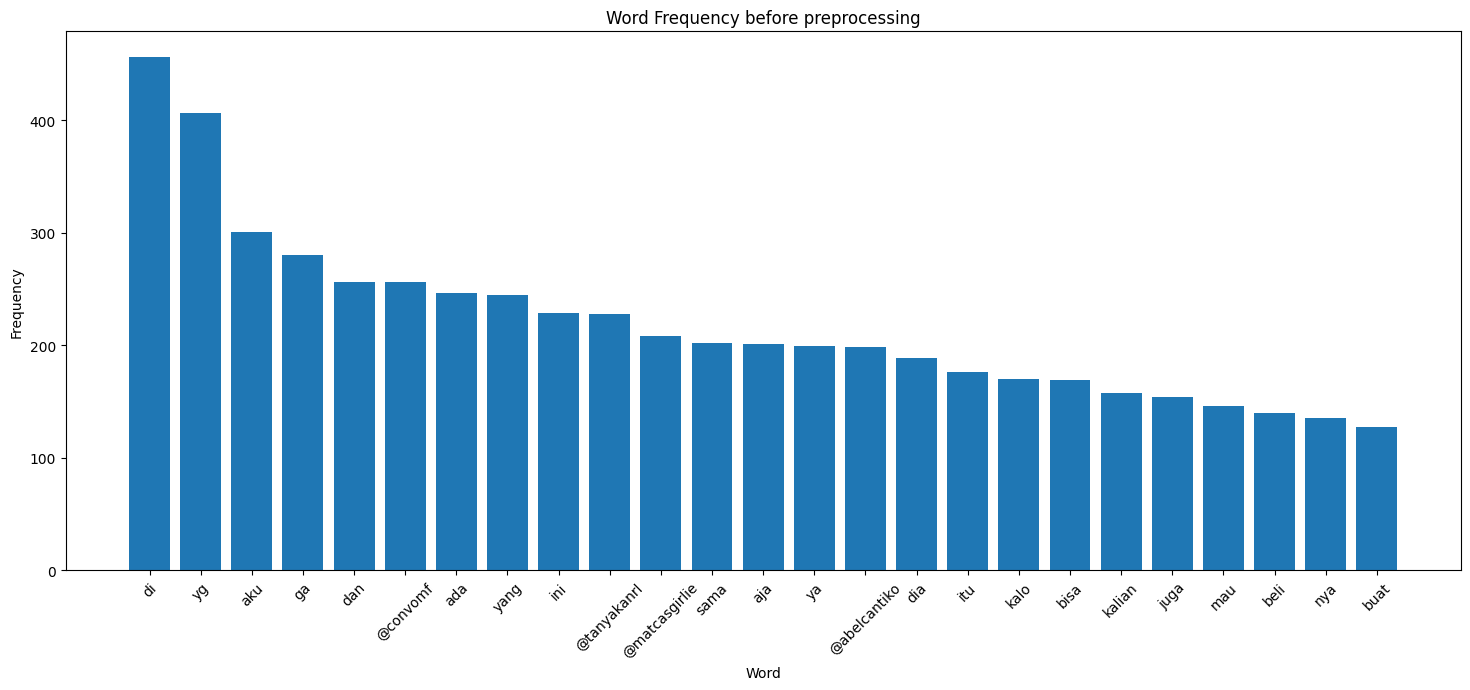

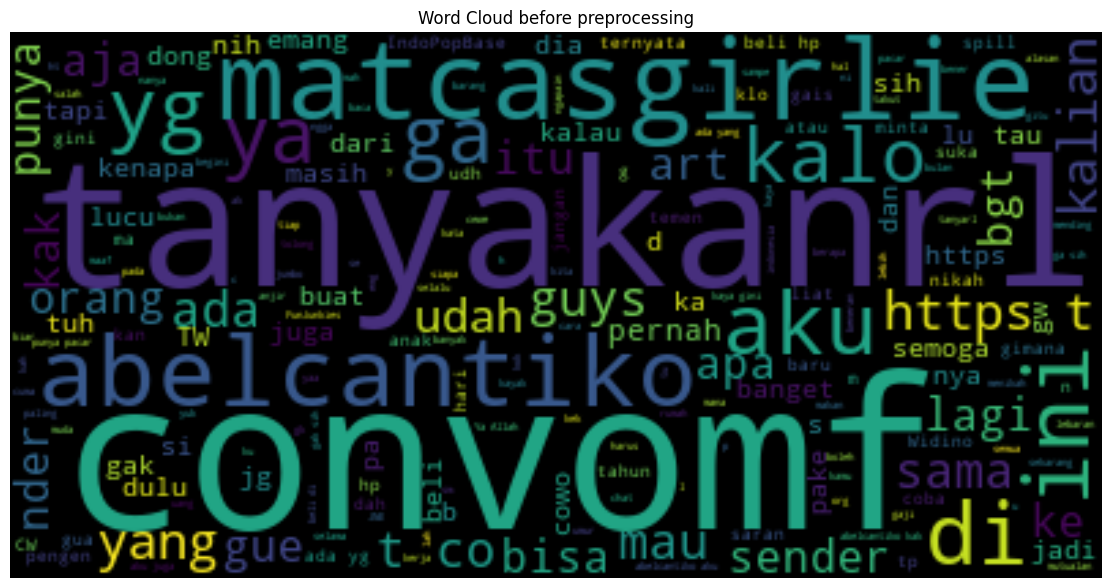

In [17]:
text_list = " ".join(data_dd).split()
text_bef = "before preprocessing"

design_frequencyBar(text_list, text_bef)
design_WordCloud(data_dd.to_string(), text_bef)

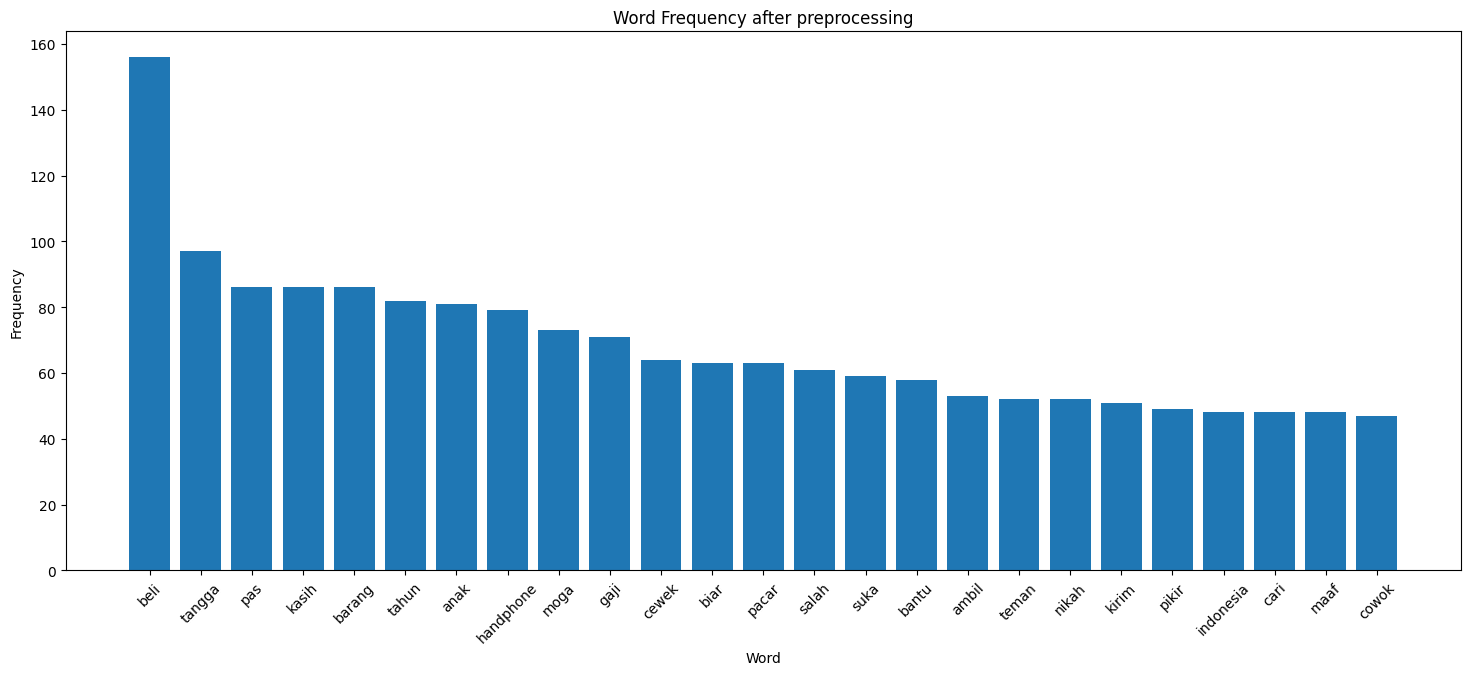

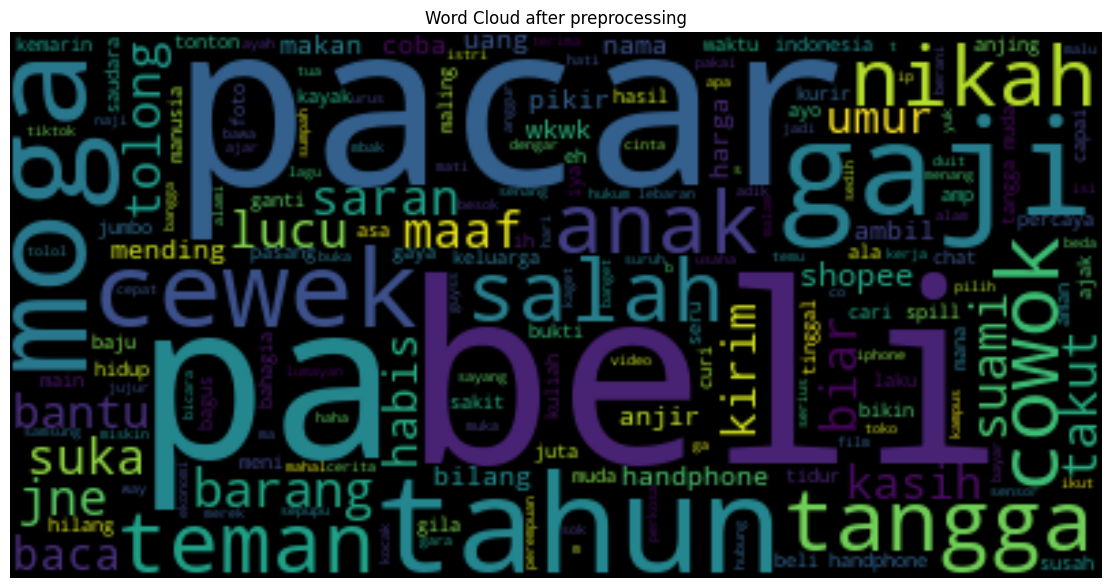

In [ ]:
# text_list = word_tokenize(data_f['text_akhir'].to_string())
# text_list = data_f['text_stemming'].to_string()
text_list = " ".join(data_f["text_akhir"]).split()

text_aft = "after preprocessing"
design_frequencyBar(text_list, text_aft)
design_WordCloud(data_f['text_akhir'].to_string(), text_aft)

In [19]:
Counter(" ".join(data_f["text_akhir"]).split()).most_common(20)

[('beli', 156),
 ('tangga', 97),
 ('pas', 86),
 ('kasih', 86),
 ('barang', 86),
 ('tahun', 82),
 ('anak', 81),
 ('handphone', 79),
 ('moga', 73),
 ('gaji', 71),
 ('cewek', 64),
 ('biar', 63),
 ('pacar', 63),
 ('salah', 61),
 ('suka', 59),
 ('bantu', 58),
 ('ambil', 53),
 ('teman', 52),
 ('nikah', 52),
 ('kirim', 51)]

In [48]:
data_f['text_akhir'].isna().sum()

0

In [23]:
# buat cek kata satu demi satu
data_f[data_f["text_akhir"].str.contains("assisten", case=False, na=False) ]
# data_f.full_text == "art"

,full_text,text_clean,text_casefoldingText,text_tokenizingText,text_slangwords,text_mergingText,text_tokenizingText2,text_stopword,text_stemming,text_akhir


# Pelabelan

In [28]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")
 

lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
 
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

else:
    print("Failed to fetch negative lexicon data")

In [29]:
def sentiment_analysis_lexicon_indonesia(text):
    
    score = 0
    for word in text:       
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
 
    polarity=''
 
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'

    return score, polarity

In [26]:
lexicon_positive == "allah"

False

In [27]:
lexicon_negative == "allah"

False

In [30]:
# bikin data baru supaya lebih fresh utk pelabelan
data_baru = data_f
data_baru 

,full_text,text_clean,text_casefoldingText,text_tokenizingText,text_slangwords,text_mergingText,text_tokenizingText2,text_stopword,text_stemming,text_akhir
0,COBA SPILL JOKES COWO TERLUCU YANG PERNAH KAL...,COBA SPILL JOKES COWO TERLUCU YANG PERNAH KALI...,coba spill jokes cowo terlucu yang pernah kali...,"[coba, spill, jokes, cowo, terlucu, yang, pern...","[coba, spill, jokes, cowok , terlucu, yang, pe...",coba spill jokes cowok terlucu yang pernah ka...,"[coba, spill, jokes, cowok, terlucu, yang, per...","[coba, spill, jokes, cowok, terlucu, dengar]","[coba, spill, jokes, cowok, lucu, dengar]",coba spill jokes cowok lucu dengar
1,NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMM...,NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMMM,ni fitur bisa diilangin aja gak sih anjimmmmmm,"[ni, fitur, bisa, diilangin, aja, gak, sih, an...","[ini , fitur, bisa, diilangin, saja , tidak, s...",ini fitur bisa diilangin saja tidak sih anji...,"[ini, fitur, bisa, diilangin, saja, tidak, sih...","[fitur, diilangin, anjimmmmmm]","[fitur, diilangin, anjimmmmmm]",fitur diilangin anjimmmmmm
2,spill isi dm km sama artis favorit-mu yang te...,spill isi dm km sama artis favoritmu yang tern...,spill isi dm km sama artis favoritmu yang tern...,"[spill, isi, dm, km, sama, artis, favoritmu, y...","[spill, isi, direct message, kamu, sama, artis...",spill isi direct message kamu sama artis favor...,"[spill, isi, direct, message, kamu, sama, arti...","[spill, isi, direct, message, artis, favoritmu...","[spill, isi, direct, message, artis, favorit, ...",spill isi direct message artis favorit cringe ...
3,beliau ini sebenernya paham atau faham https:...,beliau ini sebenernya paham atau faham,beliau ini sebenernya paham atau faham,"[beliau, ini, sebenernya, paham, atau, faham]","[beliau, ini, sebenarnya , paham, atau, paham ]",beliau ini sebenarnya paham atau paham,"[beliau, ini, sebenarnya, paham, atau, paham]","[beliau, paham, paham]","[beliau, paham, paham]",beliau paham paham
4,cekikikan wkkwkwk. coba gess tunjukun chat sa...,cekikikan wkkwkwk coba gess tunjukun chat sama...,cekikikan wkkwkwk coba gess tunjukun chat sama...,"[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...",cekikikan wkkwkwk coba gess tunjukun chat sama...,"[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikik, wkkwkwk, coba, gess, tunjukun, chat,...",cekikik wkkwkwk coba gess tunjukun chat adik
...,...,...,...,...,...,...,...,...,...,...
1602,@tanyakanrl lucu sekalii,lucu sekalii,lucu sekalii,"[lucu, sekalii]","[lucu, sekali]",lucu sekali,"[lucu, sekali]",[lucu],[lucu],lucu
1603,@tanyakanrl ya Allah..,ya Allah,ya allah,"[ya, allah]","[ya, allah]",ya allah,"[ya, allah]",[],[],
1604,@tanyakanrl yaallah semoga kekal abadi kak sam...,yaallah semoga kekal abadi kak sampai maut mem...,yaallah semoga kekal abadi kak sampai maut mem...,"[yaallah, semoga, kekal, abadi, kak, sampai, m...","[ya allah, semoga, kekal, abadi, kakak, sampai...",ya allah semoga kekal abadi kakak sampai maut ...,"[ya, allah, semoga, kekal, abadi, kakak, sampa...","[semoga, kekal, abadi, maut, memisahkan]","[moga, kekal, abadi, maut, pisah]",moga kekal abadi maut pisah
1605,@tanyakanrl GUE KAPAN YAAA,GUE KAPAN YAAA,gue kapan yaaa,"[gue, kapan, yaaa]","[saya, kapan, ya]",saya kapan ya,"[saya, kapan, ya]",[],[],


In [31]:
results = data_baru['text_stemming'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data_baru['polarity_score'] = results[0]
data_baru['polarity'] = results[1]
print(data_baru['polarity'].value_counts())
print(data_baru['polarity_score'])

polarity
negative    892
positive    715
Name: count, dtype: int64
0        4
1        0
2       -1
3        0
4        4
        ..
1602     1
1603     0
1604     9
1605     0
1606    16
Name: polarity_score, Length: 1607, dtype: int64


In [32]:
data_baru[['text_stopword','polarity_score','polarity']]

,text_stopword,polarity_score,polarity
0,"[coba, spill, jokes, cowok, terlucu, dengar]",4,positive
1,"[fitur, diilangin, anjimmmmmm]",0,positive
2,"[spill, isi, direct, message, artis, favoritmu...",-1,negative
3,"[beliau, paham, paham]",0,positive
4,"[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...",4,positive
...,...,...,...
1602,[lucu],1,positive
1603,[],0,positive
1604,"[semoga, kekal, abadi, maut, memisahkan]",9,positive
1605,[],0,positive


In [33]:
data_baru["polarity"].count()

1607

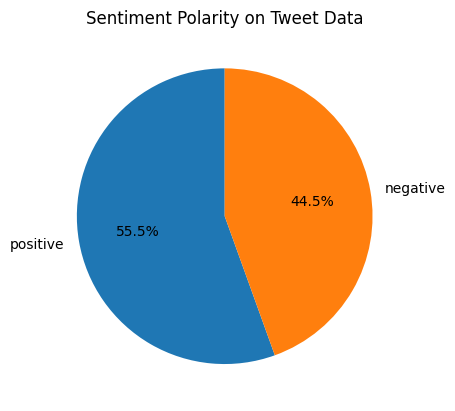

In [34]:
plt.pie(data_baru.polarity.value_counts(), labels = data_baru.polarity.drop_duplicates(), autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Polarity on Tweet Data")
plt.show() 

In [35]:
le = LabelEncoder()
data_baru['label'] = le.fit_transform(data_baru['polarity'])
display(data_baru['label'].value_counts())
display(data_baru)

label
0    892
1    715
Name: count, dtype: int64

,full_text,text_clean,text_casefoldingText,text_tokenizingText,text_slangwords,text_mergingText,text_tokenizingText2,text_stopword,text_stemming,text_akhir,polarity_score,polarity,label
0,COBA SPILL JOKES COWO TERLUCU YANG PERNAH KAL...,COBA SPILL JOKES COWO TERLUCU YANG PERNAH KALI...,coba spill jokes cowo terlucu yang pernah kali...,"[coba, spill, jokes, cowo, terlucu, yang, pern...","[coba, spill, jokes, cowok , terlucu, yang, pe...",coba spill jokes cowok terlucu yang pernah ka...,"[coba, spill, jokes, cowok, terlucu, yang, per...","[coba, spill, jokes, cowok, terlucu, dengar]","[coba, spill, jokes, cowok, lucu, dengar]",coba spill jokes cowok lucu dengar,4,positive,1
1,NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMM...,NI FITUR BISA DIILANGIN AJA GAK SIH ANJIMMMMMM,ni fitur bisa diilangin aja gak sih anjimmmmmm,"[ni, fitur, bisa, diilangin, aja, gak, sih, an...","[ini , fitur, bisa, diilangin, saja , tidak, s...",ini fitur bisa diilangin saja tidak sih anji...,"[ini, fitur, bisa, diilangin, saja, tidak, sih...","[fitur, diilangin, anjimmmmmm]","[fitur, diilangin, anjimmmmmm]",fitur diilangin anjimmmmmm,0,positive,1
2,spill isi dm km sama artis favorit-mu yang te...,spill isi dm km sama artis favoritmu yang tern...,spill isi dm km sama artis favoritmu yang tern...,"[spill, isi, dm, km, sama, artis, favoritmu, y...","[spill, isi, direct message, kamu, sama, artis...",spill isi direct message kamu sama artis favor...,"[spill, isi, direct, message, kamu, sama, arti...","[spill, isi, direct, message, artis, favoritmu...","[spill, isi, direct, message, artis, favorit, ...",spill isi direct message artis favorit cringe ...,-1,negative,0
3,beliau ini sebenernya paham atau faham https:...,beliau ini sebenernya paham atau faham,beliau ini sebenernya paham atau faham,"[beliau, ini, sebenernya, paham, atau, faham]","[beliau, ini, sebenarnya , paham, atau, paham ]",beliau ini sebenarnya paham atau paham,"[beliau, ini, sebenarnya, paham, atau, paham]","[beliau, paham, paham]","[beliau, paham, paham]",beliau paham paham,0,positive,1
4,cekikikan wkkwkwk. coba gess tunjukun chat sa...,cekikikan wkkwkwk coba gess tunjukun chat sama...,cekikikan wkkwkwk coba gess tunjukun chat sama...,"[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...",cekikikan wkkwkwk coba gess tunjukun chat sama...,"[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikikan, wkkwkwk, coba, gess, tunjukun, cha...","[cekikik, wkkwkwk, coba, gess, tunjukun, chat,...",cekikik wkkwkwk coba gess tunjukun chat adik,4,positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,@tanyakanrl lucu sekalii,lucu sekalii,lucu sekalii,"[lucu, sekalii]","[lucu, sekali]",lucu sekali,"[lucu, sekali]",[lucu],[lucu],lucu,1,positive,1
1603,@tanyakanrl ya Allah..,ya Allah,ya allah,"[ya, allah]","[ya, allah]",ya allah,"[ya, allah]",[],[],,0,positive,1
1604,@tanyakanrl yaallah semoga kekal abadi kak sam...,yaallah semoga kekal abadi kak sampai maut mem...,yaallah semoga kekal abadi kak sampai maut mem...,"[yaallah, semoga, kekal, abadi, kak, sampai, m...","[ya allah, semoga, kekal, abadi, kakak, sampai...",ya allah semoga kekal abadi kakak sampai maut ...,"[ya, allah, semoga, kekal, abadi, kakak, sampa...","[semoga, kekal, abadi, maut, memisahkan]","[moga, kekal, abadi, maut, pisah]",moga kekal abadi maut pisah,9,positive,1
1605,@tanyakanrl GUE KAPAN YAAA,GUE KAPAN YAAA,gue kapan yaaa,"[gue, kapan, yaaa]","[saya, kapan, ya]",saya kapan ya,"[saya, kapan, ya]",[],[],,0,positive,1


In [ ]:
data_baru[['text_akhir','polarity']].to_csv('data-scraping/main-dataset/dataset-lexicon.csv', index=False)

# Additional CSV
Untuk membandingkan hasil evaluasi dengan pelabelan antara BERT, Lexicon (sudah diproseskan di atas), dan TextBlob

Referensi TextBlob: https://medium.com/@azriyanarham/labeling-sentimen-bahasa-indonesia-secara-otomatis-79764f23b016

Jika ingin mengetahui IndoBert untuk jadi extraction maupun pelabelan, silakan cek file notebook-indobert.ipynb

Sekalian cek akurasi di bagian evaluasi juga ya

In [41]:
# BERT
# Import CSV yang sudah dilabelkan sentimen
data_b = pd.read_csv(r'data-scraping\main-dataset\dataset-bert.csv', delimiter = ",")
data_bert = pd.DataFrame(data_b)
data_bert

,text,label
0,coba spill jokes cowok lucu dengar,1
1,fitur diilangin anjimmmmmm,1
2,spill isi direct message artis favorit cringe ...,1
3,beliau paham paham,1
4,cekikik wkkwkwk coba gess tunjukun chat adik,1
...,...,...
1602,lucu,1
1603,NaN,1
1604,moga kekal abadi maut pisah,1
1605,NaN,1


In [42]:
display(data_bert.isna().sum())
data_bert['text'].fillna('', inplace=True)
display(data_bert.isna().sum())

text     19
label     0
dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_8320\3676177042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_bert['text'].fillna('', inplace=True)


text     0
label    0
dtype: int64

# Data Splitting & Extraction Features

### TF IDF & Bag2Words (Count)

In [43]:
co_vect = CountVectorizer()
tf_vect = TfidfVectorizer()
hash_vect = HashingVectorizer()

# vect_list = [co_vect, tf_vect, hash_vect]
vect_list = [co_vect, tf_vect]

# Additional Features
Kode tambahan untuk membandingkan hasil evaluation dengan extraction feature.

### Word2Vec
referensi: https://radimrehurek.com/gensim/models/word2vec.html

In [44]:
# use data lexicon
# model_w2v = Word2Vec(sentences=data_baru['text_stemming'], vector_size=100, window=5, min_count=2, sg=1)
# use data bert
model_w2v = Word2Vec(sentences=data_bert['text'].str.split(), vector_size=100, window=5, min_count=2, sg=1)
model_w2v

In [23]:
model_w2v.train(data_bert['text'], total_examples=1, epochs=5)

(0, 424235)

In [26]:
model_w2v.wv

In [ ]:
# Rata-rata vektor kata
def tweet_vector(tokens):
    vectors = []
    for word in tokens:
        if word in model_w2v.wv:
            vectors.append(model_w2v.wv[word]) 
    if len(vectors) > 0:
        meanVec = np.mean(vectors, axis=0)
        return meanVec
    else:
        featureVec = np.zeros(model_w2v.vector_size)
        return featureVec

# data_baru['text_word2vec'] = data_baru['text_stemming'].apply(tweet_vector)
data_bert['text_word2vec'] = data_bert['text'].str.split().apply(tweet_vector)

In [35]:
# data_baru
data_bert

,text,label,text_word2vec
0,coba spill jokes cowok lucu dengar,1,"[-0.025252327, 0.17633106, 0.03986606, -0.0272..."
1,fitur diilangin anjimmmmmm,1,"[0.0019238527, 0.018795483, 0.014764532, -0.00..."
2,spill isi direct message artis favorit cringe ...,1,"[-0.01928936, 0.10928357, 0.026099615, -0.0153..."
3,beliau paham paham,1,"[-0.024782399, 0.117346965, 0.022852547, -0.01..."
4,cekikik wkkwkwk coba gess tunjukun chat adik,1,"[-0.026084173, 0.17189589, 0.0424499, -0.01673..."
...,...,...,...
1602,lucu,1,"[-0.02366961, 0.15883788, 0.0276422, -0.021869..."
1603,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1604,moga kekal abadi maut pisah,1,"[-0.028399516, 0.14416139, 0.028143264, -0.017..."
1605,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [47]:
# Word2Vec
# x = np.vstack(data_baru['text_word2vec'].values)
x = np.vstack(data_bert['text_word2vec'].values)
# y = data_baru["label"]
y = data_bert["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print(vect_list[k])
print("Length x_train:", x_train.shape[0])
print("Length y_train:",y_train.shape[0])
print("Length x_test:", x_test.shape[0])
print("Length y_test:", y_test.shape[0], "\n")

Length x_train: 1285
Length y_train: 1285
Length x_test: 322
Length y_test: 322 



In [ ]:
# TF-IDF, Bag2words (Count) BERT
# x = data_baru["text_akhir"]
x = data_bert["text"]
# y = data_baru["label"]
y = data_bert["label"]

data_vect=[]
splitdata_list = []
for j in range(len(vect_list)):
    vectorized = vect_list[j].fit_transform(x).toarray()
    # vectorized = vect_list[j].fit_transform(x)
    data_vect.append(vectorized)
    
for k in range(len(data_vect)):
    x_train, x_test, y_train, y_test = train_test_split(data_vect[k], y, test_size=0.2, random_state=42)
    print(vect_list[k])
    print("Length x_train:", x_train.shape[0])
    print("Length y_train:",y_train.shape[0])
    print("Length x_test:", x_test.shape[0])
    print("Length y_test:", y_test.shape[0], "\n")
    

CountVectorizer()
Length x_train: 1285
Length y_train: 1285
Length x_test: 322
Length y_test: 322 

TfidfVectorizer()
Length x_train: 1285
Length y_train: 1285
Length x_test: 322
Length y_test: 322 



In [7]:
for k in range(len(data_vect)):
    print(vect_list[k])
    print("Length x_train:", x_train[k])

CountVectorizer()
Length x_train: [0. 0. 0. ... 0. 0. 0.]
TfidfVectorizer()
Length x_train: [0. 0. 0. ... 0. 0. 0.]


In [8]:
data_vect

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [9]:
y_train.value_counts()

label
1    1205
0      80
Name: count, dtype: int64

# Modelling & Evaluation

In [52]:
svm = SVC()
rf = RandomForestClassifier() 
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=42)
lr = LogisticRegression()
gnb = GaussianNB()

In [53]:
def findMetrics(x_train, x_test, y_train, y_test, train, model_label, vect_label):
    y_pred_train = train.predict(x_train)
    y_pred_test = train.predict(x_test)
    print("Klasifikasi", model_label , "dengan",vect_label,":")
    print("Accuracy Train:", accuracy_score(y_train, y_pred_train) * 100)
    print("Accuracy Test:", accuracy_score(y_test, y_pred_test) * 100)
    print("\n")

def train_model(classification, x_train, y_train):
    train = classification.fit(x_train, y_train)
    return train

Training model using data bert (word2vec)

In [73]:
classifications = [svm, rf, dt, lr, knn, gnb]

for i in range(len(classifications)):
    train = train_model(classifications[i], x_train, y_train)
    findMetrics(x_train, x_test, y_train, y_test, train, classifications[i], model_w2v) 

Klasifikasi SVC() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 93.77431906614785
Accuracy Test: 94.09937888198758


Klasifikasi RandomForestClassifier() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 99.45525291828794
Accuracy Test: 93.7888198757764


Klasifikasi DecisionTreeClassifier() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 99.45525291828794
Accuracy Test: 86.33540372670807


Klasifikasi LogisticRegression() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 93.77431906614785
Accuracy Test: 94.09937888198758


Klasifikasi KNeighborsClassifier(n_neighbors=42) dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 93.77431906614785
Accuracy Test: 94.09937888198758


Klasifikasi GaussianNB() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 76.73151750972764
Accuracy Test: 79.5031055900621




Training model using data lexicon (word2vec)

In [54]:
classifications = [svm, rf, dt, lr, knn, gnb]

for i in range(len(classifications)):
    train = train_model(classifications[i], x_train, y_train)
    findMetrics(x_train, x_test, y_train, y_test, train, classifications[i], model_w2v) 

Klasifikasi SVC() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 59.354838709677416
Accuracy Test: 57.234726688102896


Klasifikasi RandomForestClassifier() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 99.91935483870968
Accuracy Test: 61.7363344051447


Klasifikasi DecisionTreeClassifier() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 99.91935483870968
Accuracy Test: 53.054662379421224


Klasifikasi LogisticRegression() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 58.79032258064516
Accuracy Test: 57.556270096463024


Klasifikasi KNeighborsClassifier(n_neighbors=42) dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 60.483870967741936
Accuracy Test: 57.87781350482315


Klasifikasi GaussianNB() dengan Word2Vec<vocab=1623, vector_size=100, alpha=0.025> :
Accuracy Train: 58.30645161290322
Accuracy Test: 56.59163987138264




Training model using data lexicon (TF IDF & Count)

In [ ]:
# untuk sementara, kita execute vectorizer lain saja. jangan execute hashing vector karena terlalu makan waktu
classifications = [svm, rf, dt, lr, knn, gnb]

for i in range(len(classifications)):
    for j in range(len(vect_list)):
        x_train, x_test, y_train, y_test = train_test_split(data_vect[j], y, test_size=0.2, random_state=42)
        train = train_model(classifications[i], x_train, y_train)
        findMetrics(x_train, x_test, y_train, y_test, train, classifications[i], vect_list[j]) 

Klasifikasi SVC() dengan CountVectorizer() :
Accuracy Train: 94.78599221789882
Accuracy Test: 72.67080745341616


Klasifikasi SVC() dengan TfidfVectorizer() :
Accuracy Train: 99.92217898832685
Accuracy Test: 72.98136645962732


Klasifikasi RandomForestClassifier() dengan CountVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 72.98136645962732


Klasifikasi RandomForestClassifier() dengan TfidfVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 72.04968944099379


Klasifikasi DecisionTreeClassifier() dengan CountVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 69.56521739130434


Klasifikasi DecisionTreeClassifier() dengan TfidfVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 71.42857142857143


Klasifikasi LogisticRegression() dengan CountVectorizer() :
Accuracy Train: 99.37743190661479
Accuracy Test: 78.26086956521739


Klasifikasi LogisticRegression() dengan TfidfVectorizer() :
Accuracy Train: 95.09727626459143
Accuracy Test: 72.67080745341616


Klasifikasi KNeighborsClassifi

Training model using data bert (TF IDF & Count)

In [12]:
classifications = [svm, rf, dt, lr, knn, gnb]

for i in range(len(classifications)):
    for j in range(len(vect_list)):
        x_train, x_test, y_train, y_test = train_test_split(data_vect[j], y, test_size=0.2, random_state=42)
        train = train_model(classifications[i], x_train, y_train)
        findMetrics(x_train, x_test, y_train, y_test, train, classifications[i], vect_list[j]) 

Klasifikasi SVC() dengan CountVectorizer() :
Accuracy Train: 94.24124513618676
Accuracy Test: 94.09937888198758


Klasifikasi SVC() dengan TfidfVectorizer() :
Accuracy Train: 94.78599221789882
Accuracy Test: 94.09937888198758


Klasifikasi RandomForestClassifier() dengan CountVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 92.85714285714286


Klasifikasi RandomForestClassifier() dengan TfidfVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 93.7888198757764


Klasifikasi DecisionTreeClassifier() dengan CountVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 86.95652173913044


Klasifikasi DecisionTreeClassifier() dengan TfidfVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 91.30434782608695


Klasifikasi LogisticRegression() dengan CountVectorizer() :
Accuracy Train: 95.95330739299611
Accuracy Test: 94.09937888198758


Klasifikasi LogisticRegression() dengan TfidfVectorizer() :
Accuracy Train: 93.77431906614785
Accuracy Test: 94.09937888198758


Klasifikasi KNeighborsClassifie

Berdasarkan hasil evaluasi, akurasi testing tertinggi adalah Logistic Regression dengan Count Vectorizer

# Sentence Testing
- Memilih model logistic regression karena akurasi tertinggi dengan Count Vectorizer

In [ ]:
# memasukkan kalimat baru pada output
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_casefolded)
kalimat_baru_slangfixed = replacingText(kalimat_baru_tokenized)
kalimat_baru_merged = toSentence(kalimat_baru_slangfixed)
kalimat_baru_tokenized2 = tokenizingText(kalimat_baru_merged)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized2)
kalimat_baru_stemmed = stemmingText(kalimat_baru_filtered)
kalimat_baru_final = toSentence(kalimat_baru_stemmed)
# kalimat_baru_final = toSentence(kalimat_baru_filtered)

vect_kalimat_baru = co_vect.transform([kalimat_baru_final])

prediksi_sentimen = lr.predict(vect_kalimat_baru)

if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")